2025-07-30 21:57:59.420 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 21:57:59.424 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-07-30 21:57:59.429 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-07-30 21:57:59.432 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 21:57:59.727 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-30 21:57:59.733 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 21:57:59.734 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running 

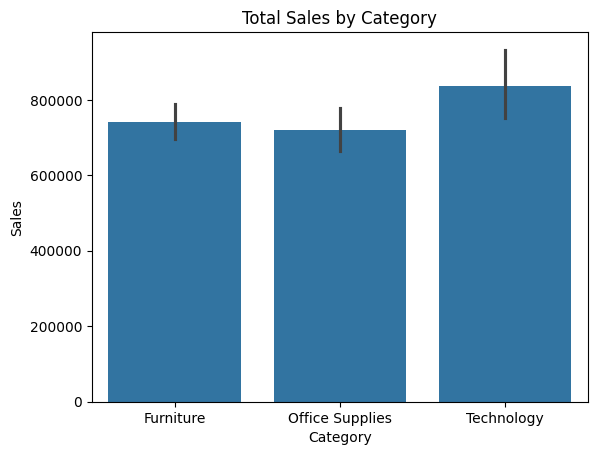

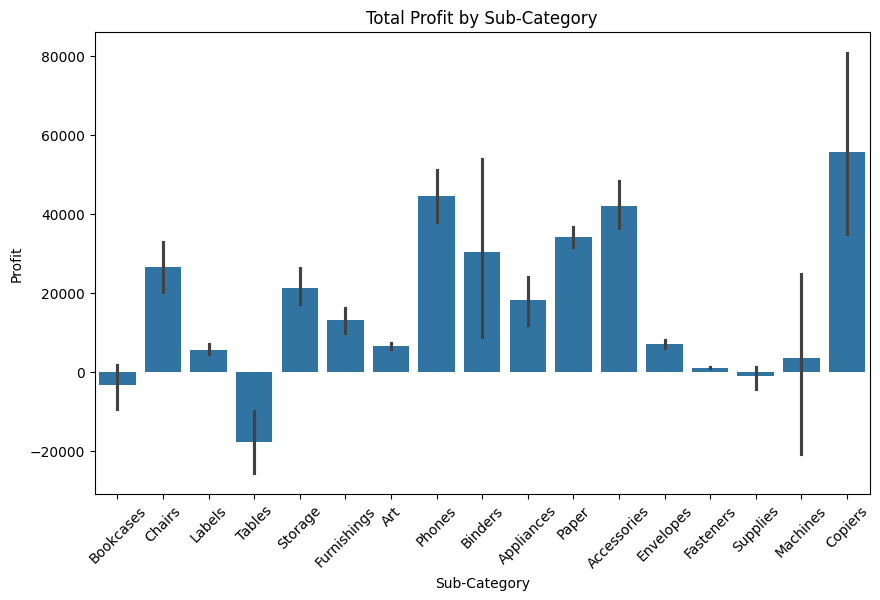

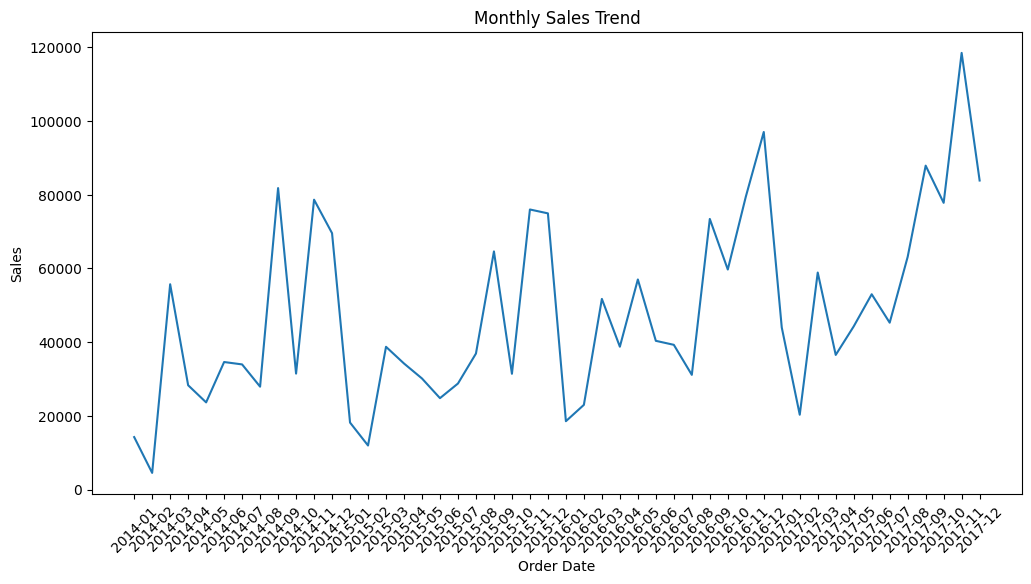

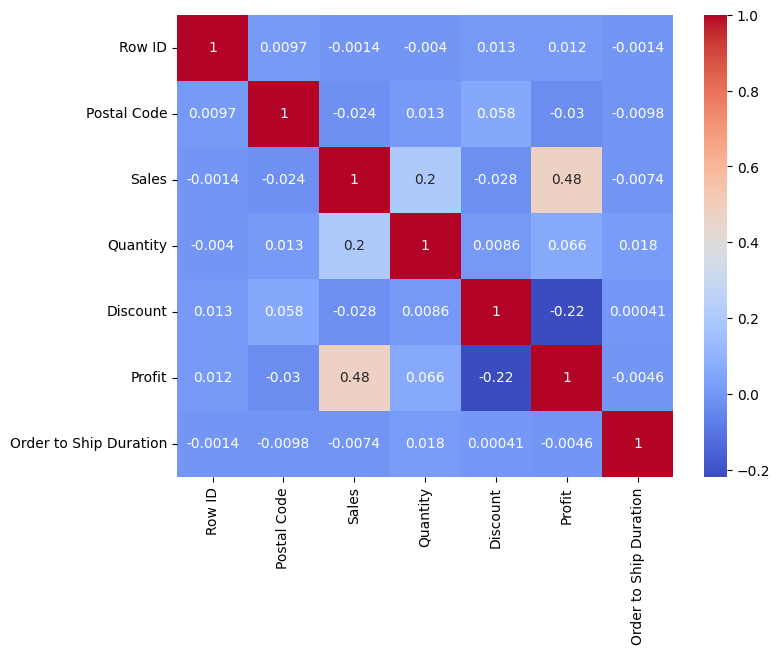

In [9]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set page config
st.set_page_config(page_title="Superstore Analysis", page_icon="📊", layout="wide")

# Load data
@st.cache_data
def load_data():
    df = pd.read_csv("/content/Sample - Superstore.csv", encoding='latin-1')
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df['Ship Date'] = pd.to_datetime(df['Ship Date'])
    df['Order to Ship Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
    return df

df = load_data()

# Sidebar filters
st.sidebar.header("Filters")
selected_year = st.sidebar.selectbox("Select Year", options=['All'] + sorted(df['Order Date'].dt.year.unique()))
selected_category = st.sidebar.selectbox("Select Category", options=['All'] + list(df['Category'].unique()))
selected_region = st.sidebar.selectbox("Select Region", options=['All'] + list(df['Region'].unique()))

# Apply filters
filtered_df = df.copy()
if selected_year != 'All':
    filtered_df = filtered_df[filtered_df['Order Date'].dt.year == selected_year]
if selected_category != 'All':
    filtered_df = filtered_df[filtered_df['Category'] == selected_category]
if selected_region != 'All':
    filtered_df = filtered_df[filtered_df['Region'] == selected_region]

# Main page
st.title("Superstore Sales Analysis")
st.write("Explore sales data and get insights")

# Show filtered data
if st.checkbox("Show filtered data"):
    st.write(filtered_df)

# Basic stats
st.header("Basic Statistics")
col1, col2, col3 = st.columns(3)
col1.metric("Total Sales", f"${filtered_df['Sales'].sum():,.2f}")
col2.metric("Total Profit", f"${filtered_df['Profit'].sum():,.2f}")
col3.metric("Average Order to Ship Duration", f"{filtered_df['Order to Ship Duration'].mean():.1f} days")

# Sales by category
st.header("Sales by Category")
fig, ax = plt.subplots()
sns.barplot(data=filtered_df, x='Category', y='Sales', estimator=sum, ax=ax)
ax.set_title("Total Sales by Category")
st.pyplot(fig)

# Profit by sub-category
st.header("Profit by Sub-Category")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=filtered_df, x='Sub-Category', y='Profit', estimator=sum, ax=ax)
ax.set_title("Total Profit by Sub-Category")
plt.xticks(rotation=45)
st.pyplot(fig)

# Sales over time
st.header("Sales Over Time")
time_df = filtered_df.groupby(filtered_df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
time_df['Order Date'] = time_df['Order Date'].astype(str)
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=time_df, x='Order Date', y='Sales', ax=ax)
ax.set_title("Monthly Sales Trend")
plt.xticks(rotation=45)
st.pyplot(fig)

# Correlation heatmap
st.header("Correlation Heatmap")
numeric_df = filtered_df.select_dtypes(include=[np.number])
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', ax=ax)
st.pyplot(fig)

# Simple prediction model
st.header("Sales Prediction Model")

# Select features
st.subheader("Select Features for Prediction")
features = st.multiselect("Choose features",
                         ['Quantity', 'Discount', 'Order to Ship Duration'],
                         default=['Quantity', 'Discount'])

if features:
    X = filtered_df[features]
    y = filtered_df['Sales']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    st.write(f"Model trained with R-squared: {model.score(X_test, y_test):.2f}")
    st.write(f"Mean Squared Error: {mse:.2f}")

    # Show coefficients
    st.subheader("Model Coefficients")
    coef_df = pd.DataFrame({
        'Feature': features,
        'Coefficient': model.coef_
    })
    st.write(coef_df)

    # Prediction interface
    st.subheader("Make a Prediction")
    input_values = {}
    cols = st.columns(len(features))
    for i, feature in enumerate(features):
        input_values[feature] = cols[i].number_input(feature,
                                                   min_value=float(filtered_df[feature].min()),
                                                   max_value=float(filtered_df[feature].max()),
                                                   value=float(filtered_df[feature].median()))

    if st.button("Predict Sales"):
        input_df = pd.DataFrame([input_values])
        prediction = model.predict(input_df)
        st.success(f"Predicted Sales: ${prediction[0]:.2f}")

In [6]:
pip install streamlit pandas numpy matplotlib seaborn scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.3 MB/s eta 0:00:00


In [14]:
!streamlit run superstore_app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: superstore_app.py


In [15]:
%%writefile superstore_app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set page config
st.set_page_config(page_title="Superstore Analysis", page_icon="📊", layout="wide")

# Load data
@st.cache_data
def load_data():
    df = pd.read_csv("/content/Sample - Superstore.csv", encoding='latin-1')
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df['Ship Date'] = pd.to_datetime(df['Ship Date'])
    df['Order to Ship Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
    return df

df = load_data()

# Sidebar filters
st.sidebar.header("Filters")
selected_year = st.sidebar.selectbox("Select Year", options=['All'] + sorted(df['Order Date'].dt.year.unique()))
selected_category = st.sidebar.selectbox("Select Category", options=['All'] + list(df['Category'].unique()))
selected_region = st.sidebar.selectbox("Select Region", options=['All'] + list(df['Region'].unique()))

# Apply filters
filtered_df = df.copy()
if selected_year != 'All':
    filtered_df = filtered_df[filtered_df['Order Date'].dt.year == selected_year]
if selected_category != 'All':
    filtered_df = filtered_df[filtered_df['Category'] == selected_category]
if selected_region != 'All':
    filtered_df = filtered_df[filtered_df['Region'] == selected_region]

# Main page
st.title("Superstore Sales Analysis")
st.write("Explore sales data and get insights")

# Show filtered data
if st.checkbox("Show filtered data"):
    st.write(filtered_df)

# Basic stats
st.header("Basic Statistics")
col1, col2, col3 = st.columns(3)
col1.metric("Total Sales", f"${filtered_df['Sales'].sum():,.2f}")
col2.metric("Total Profit", f"${filtered_df['Profit'].sum():,.2f}")
col3.metric("Average Order to Ship Duration", f"{filtered_df['Order to Ship Duration'].mean():.1f} days")

# Sales by category
st.header("Sales by Category")
fig, ax = plt.subplots()
sns.barplot(data=filtered_df, x='Category', y='Sales', estimator=sum, ax=ax)
ax.set_title("Total Sales by Category")
st.pyplot(fig)

# Profit by sub-category
st.header("Profit by Sub-Category")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=filtered_df, x='Sub-Category', y='Profit', estimator=sum, ax=ax)
ax.set_title("Total Profit by Sub-Category")
plt.xticks(rotation=45)
st.pyplot(fig)

# Sales over time
st.header("Sales Over Time")
time_df = filtered_df.groupby(filtered_df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
time_df['Order Date'] = time_df['Order Date'].astype(str)
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=time_df, x='Order Date', y='Sales', ax=ax)
ax.set_title("Monthly Sales Trend")
plt.xticks(rotation=45)
st.pyplot(fig)

# Correlation heatmap
st.header("Correlation Heatmap")
numeric_df = filtered_df.select_dtypes(include=[np.number])
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', ax=ax)
st.pyplot(fig)

# Simple prediction model
st.header("Sales Prediction Model")

# Select features
st.subheader("Select Features for Prediction")
features = st.multiselect("Choose features",
                         ['Quantity', 'Discount', 'Order to Ship Duration'],
                         default=['Quantity', 'Discount'])

if features:
    X = filtered_df[features]
    y = filtered_df['Sales']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    st.write(f"Model trained with R-squared: {model.score(X_test, y_test):.2f}")
    st.write(f"Mean Squared Error: {mse:.2f}")

    # Show coefficients
    st.subheader("Model Coefficients")
    coef_df = pd.DataFrame({
        'Feature': features,
        'Coefficient': model.coef_
    })
    st.write(coef_df)

    # Prediction interface
    st.subheader("Make a Prediction")
    input_values = {}
    cols = st.columns(len(features))
    for i, feature in enumerate(features):
        input_values[feature] = cols[i].number_input(feature,
                                                   min_value=float(filtered_df[feature].min()),
                                                   max_value=float(filtered_df[feature].max()),
                                                   value=float(filtered_df[feature].median()))

    if st.button("Predict Sales"):
        input_df = pd.DataFrame([input_values])
        prediction = model.predict(input_df)
        st.success(f"Predicted Sales: ${prediction[0]:.2f}")

Writing superstore_app.py
